In [1]:
!pip install openpyxl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
path_to_file = 'C:/Users/38093/Downloads/Grocery Database.xlsx'

In [4]:
xl = pd.ExcelFile(path_to_file)
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

In [5]:
xl.parse('Fact Summary')

,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/1...
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


In [6]:
df = pd.read_excel(path_to_file)

**Початковий аналіз даних:**

In [7]:
print("Розмір даних:", df.shape)

Розмір даних: (50447, 32)


In [8]:
print("Структура даних:\n", df.dtypes)

Структура даних:
 Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      o

In [9]:
missing_values = df.isnull().sum()
print("Пропущені значення:\n", missing_values)

Пропущені значення:
 Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
dtype: int64


In [10]:
df[df.duplicated()]

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
32664,GSB00094,2016-02-12,2016,2,14:01:00.088000,9853108031,MIDSG0091,2,60,Female,...,0.07,8.41662,Cash,ING Bank,0.093,0.15,0.757,0.38502,0.621,3.13398


In [11]:
df[df['Receipt Number'] == "GSB00094"].iloc[0:5, 10:25]

,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode
32663,Bedok,Singapore,"Choco, Snacks, Sweets",snacks,Tostitos medium chunky salsa,Tostitos,270 g,4.14,1,0.05,3.933,7.866,0.07,8.41662,Cash
32664,Bedok,Singapore,"Choco, Snacks, Sweets",snacks,Tostitos medium chunky salsa,Tostitos,270 g,4.14,1,0.05,3.933,7.866,0.07,8.41662,Cash


**Тепер перейдемо до запитань.**

**1. Розрахунок розподілу гендерного складу клієнтів.**

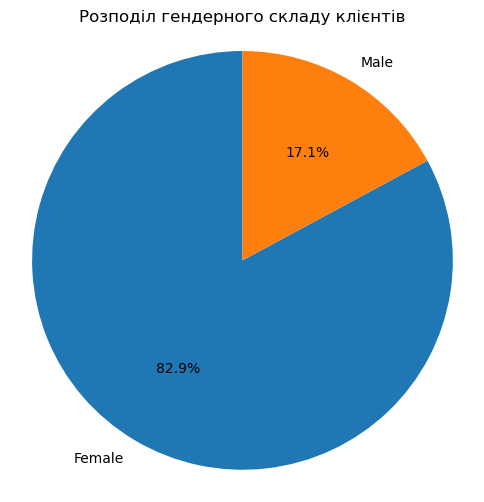

In [12]:
gender_distribution = df["Gender"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title("Розподіл гендерного складу клієнтів")
plt.show()

Висновок: Бачимо, що переважна кількість клієнтів є жіночою.

**2. Як вік покупців пов'язаний з їхніми купівельними звичками?**

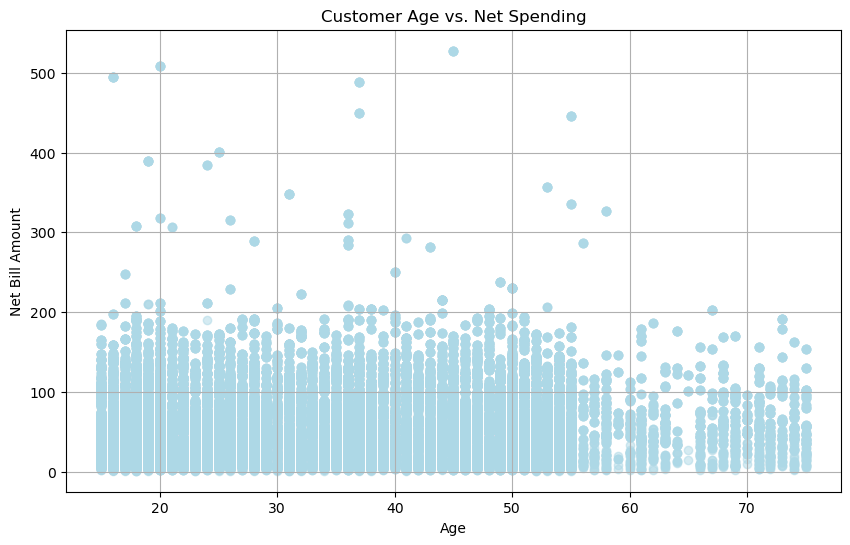

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Net Bill Amount'], alpha=0.5, color='lightblue')
plt.title('Customer Age vs. Net Spending')
plt.xlabel('Age')
plt.ylabel('Net Bill Amount')
plt.grid(True)
plt.show()

Висновок: Ця діаграма допомагає виявити будь-яку кореляцію або закономірності між віком клієнтів та їхніми звичками щодо витрат, що може стати основою для цільових маркетингових стратегій.

**3. Як взаємодіють між собою стать, вік та чисті витрати, якщо їх візуалізувати на парному графіку?**

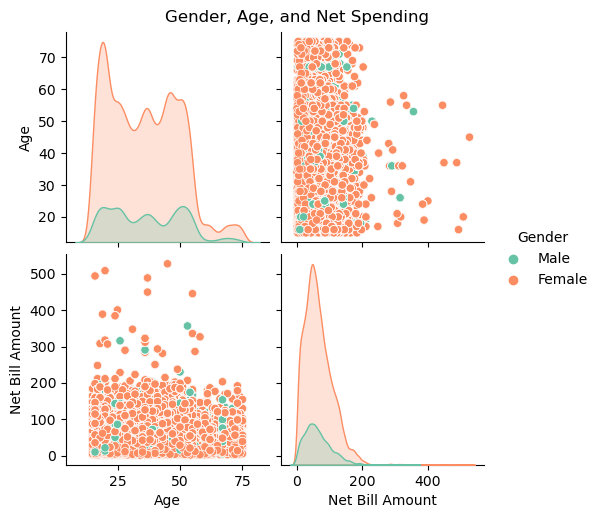

In [14]:
pair_plot_data_38 = df[['Gender', 'Age', 'Net Bill Amount']]
pair_plot = sns.pairplot(pair_plot_data_38, hue='Gender', palette='Set2')
pair_plot.fig.suptitle('Gender, Age, and Net Spending', y=1.02)
plt.show()

Висновок: Цей парний графік допомагає нам зрозуміти взаємозв'язок між статтю, віком та чистими витратами серед клієнтів. Подальший аналіз може бути проведений для того, щоб заглибитися в гендерні особливості купівельної поведінки та розробити цільові маркетингові стратегії на основі отриманих даних.

**4. Яким є розподіл клієнтів за статтю, і як він відрізняється в різних містах?**

In [15]:
customer_gender_city = pd.pivot_table(df, values='Mobile Number', index=['City'], columns=['Gender'], aggfunc='count', fill_value=0)
customer_gender_city

Gender,Female,Male
City,,
Bedok,11062,1210
Jakarta,7378,1730
Kuala Lumpur,8176,2587
Manila,9537,2843
Woodlands,5669,255


Висновок: Ця зведена таблиця дає уявлення про гендерний розподіл клієнтів у різних містах, що може бути корисним для цільових маркетингових кампаній та управління запасами.

**5. Розрахунок найпопулярніших товарів за кількістю продажів.**

In [16]:
top_selling_items = df.groupby("Items")["QTY"].sum().sort_values(ascending=False).head(10)
print(top_selling_items)

Items
Sainsbury salted tortilla chips                1314
Ashai Lager Beer                               1240
Anchor salted pure butter                      1017
Nutro Beef with vegetables dog food             992
Lamb pate dog food                              991
Fresh Soyamilk                                  991
Alpo Chicken pate dog food                      983
Original wholemeal bread                        957
PEDIGREE Adult complete nuritition dog food     952
3 in 1 cereal drink original                    768
Name: QTY, dtype: int64


**6. Ось так виглядає, якщо брати по категоріях.**

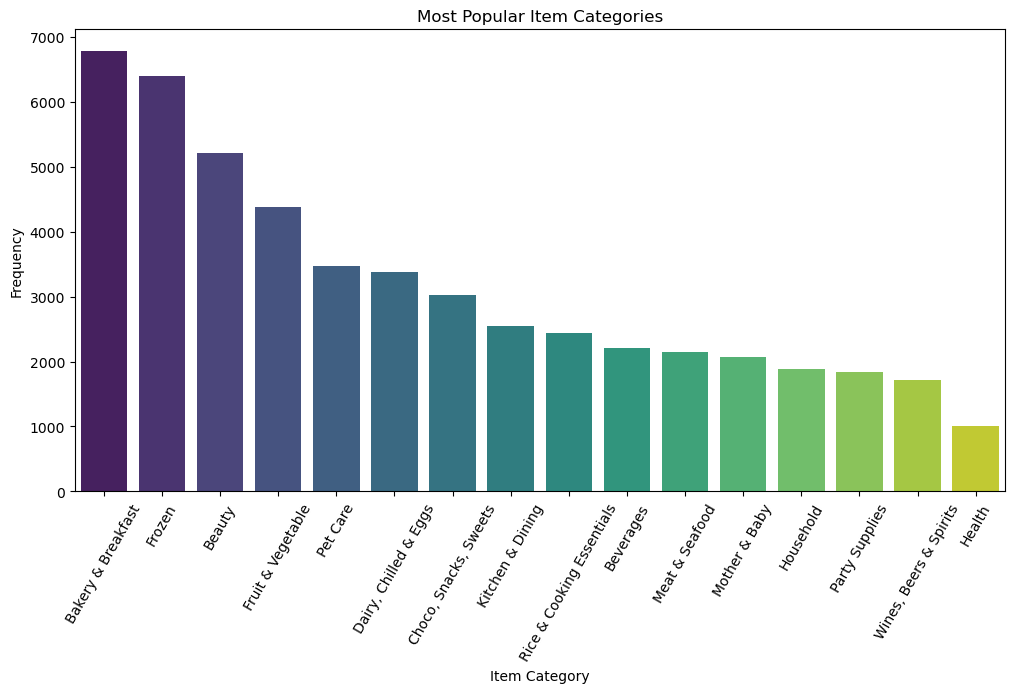

In [17]:
category_counts = df['Category'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Most Popular Item Categories')
plt.xlabel('Item Category')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.show()

Висновок: Цікаво що, більшість найпопулярніших товарів не з категорії топ 5.

**7. Як змінюється кількість продажів у різних категоріях товарів протягом року?**

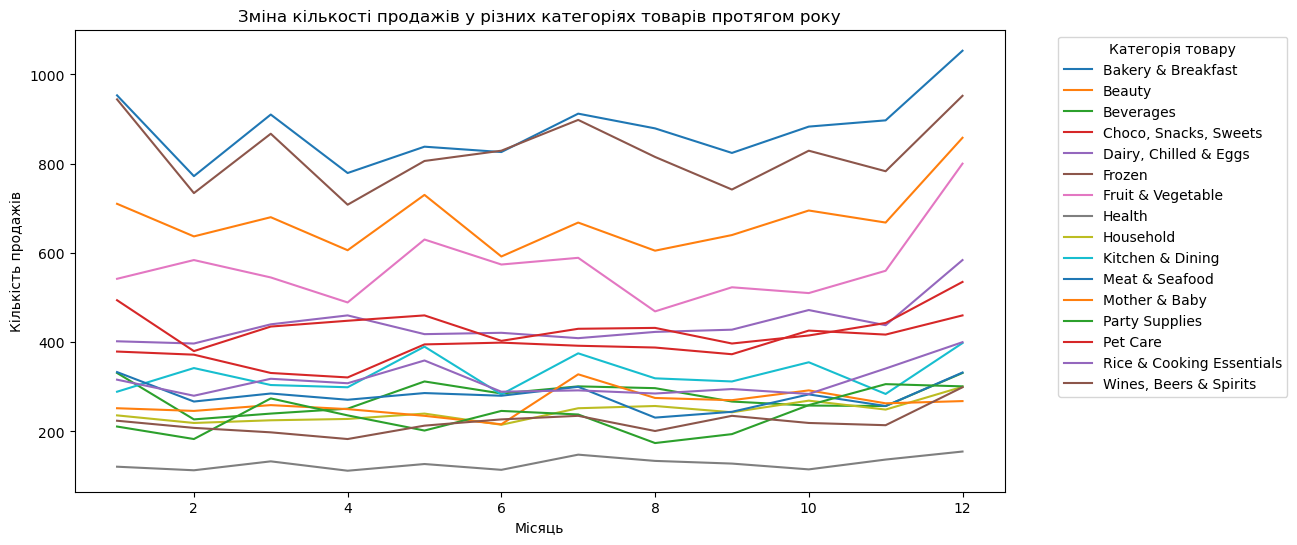

In [18]:
category_sales_over_time = df.pivot_table(index='Month', columns='Category', values='QTY', aggfunc='sum')
ax = category_sales_over_time.plot(figsize=(12, 6))
plt.xlabel("Місяць")
plt.ylabel("Кількість продажів")
plt.title("Зміна кількості продажів у різних категоріях товарів протягом року")
plt.legend(title="Категорія товару", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Висновок: Графік дозволяє відслідковувати зміни кількості продажів у різних категоріях товарів протягом року. Це може бути корисно для планування запасів та асортименту товарів.

**8. Розрахунок обсягів продажів за містами.**

In [19]:
city_sales = df.groupby("City")["Net Bill Amount"].sum()
top_cities_for_expansion = city_sales.sort_values(ascending=False).head(5)
top_cities_for_expansion = top_cities_for_expansion.round(2)
print(top_cities_for_expansion)

City
Bedok           808532.34
Manila          799828.32
Kuala Lumpur    727760.01
Jakarta         616394.79
Woodlands       412057.91
Name: Net Bill Amount, dtype: float64


**9. Який спосіб оплати найпопулярніший?**

In [20]:
top_payment_modes = df['Payment Mode'].value_counts()
print(top_payment_modes)

Card      17149
Wallet    16867
Cash      16431
Name: Payment Mode, dtype: int64


Висновок: Ця інформація може бути використана для інформування стратегій продажів бізнесу. Бізнес може зосередитися на розширенні присутності в онлайн-каналах або покращенні досвіду покупок у роздрібних магазинах.

**10. Як використання різних способів оплати змінюється з часом?**

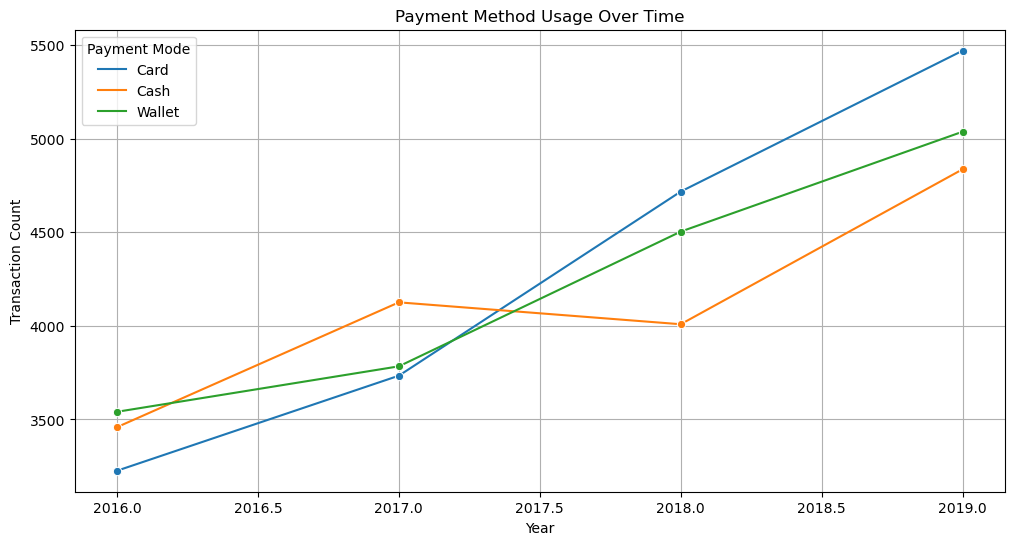

In [21]:
payment_method_counts = df.groupby(['Year', 'Payment Mode'])['Receipt Number'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=payment_method_counts, x='Year', y='Receipt Number', hue='Payment Mode', marker='o')
plt.title('Payment Method Usage Over Time')
plt.xlabel('Year')
plt.ylabel('Transaction Count')
plt.legend(title='Payment Mode', loc='upper left')
plt.grid(True)
plt.show()

**11. Який розподіл транзакцій по годинам?**

In [22]:
df['Time'] = df['Time'].apply(lambda x: pd.to_datetime("2023-09-27 " + str(x)))
pivot_table = pd.pivot_table(df, values='Receipt Number', index=df['Time'].dt.hour, aggfunc='count')
print(pivot_table)

      Receipt Number
Time                
10              4171
11              4022
12              4139
13              4418
14              4043
15              4265
16              4184
17              4036
18              4267
19              4215
20              4446
21              4241


Висновок: Бачимо що пік покупок підпадає на вечірній проміжок часу, а також є вийнятки у виді 1 та 3 години дня, вірогідно що це години коли люди вільні від роботи.

**12. Загальна динаміка продажів.**

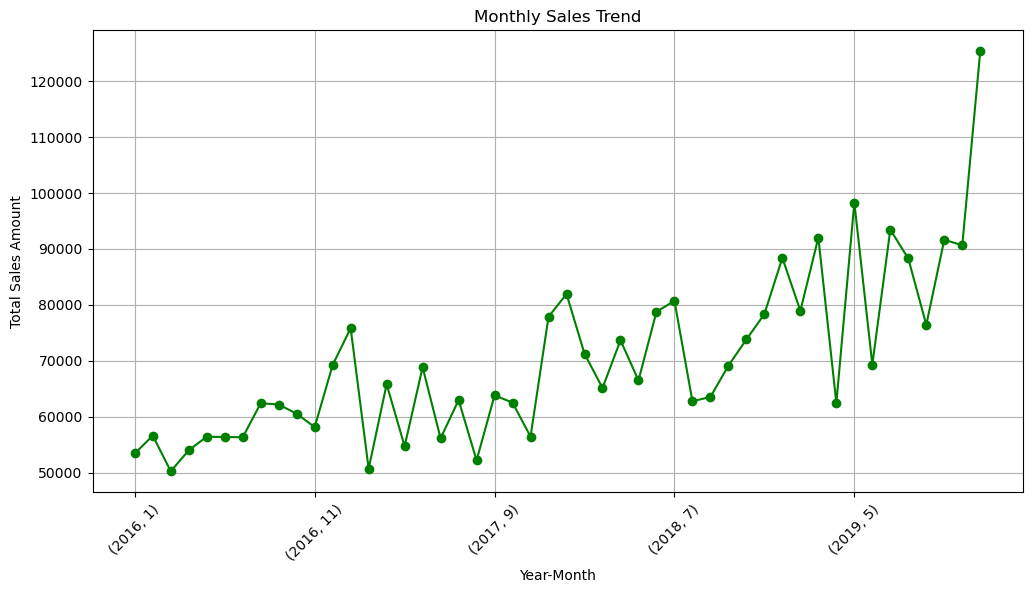

In [23]:
monthly_sales = df.groupby(['Year', 'Month'])['Net Bill Amount'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o', linestyle='-', color='g')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Висновки: 
1. Загальний обсяг продажів відзначається певними коливаннями протягом року, але взагалі відзначає зростання протягом років. Це може бути добрим знаком для бізнесу, оскільки він показує позитивну тенденцію у зростанні продажів.

2. Існує певна сезонність, оскільки кількість продажів зазвичай зростає в певні місяці року, а потім зменшується. Наприклад, на графіку видно, що кожного 12-1 місяця є піки у продажах.

3. Графік допомагає виділити потенційні періоди для акцій та маркетингових заходів. Наприклад, під час місяців з великим зростанням продажів можна розглядати можливість запуску рекламних кампаній або пропозицій для залучення більшої кількості клієнтів.